# Predicting Usage of a Video Game Research Server

## Introduction

[A Computer Science research group](https://plai.cs.ubc.ca/) at UBC collected data regarding how, and what kind of people play video games. This was done by them setting up a Minecraft server, allowing players to play however they liked, and collecting that data. While they are interested in 3 broad questions, my aim is to try and answer this one: 

*What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?*

More specifically, the general question I will be trying to answer is: **Can gaming experience, gender, age, or playtime predict being subscribed to a game-related newsletter?**

With the two data files provided of player data and play session data, my goal is to wrangle, separate, and visualize the necessary data to see which characteristics are most predictive of subscribing to a game-related newsletter, and how they differ between player types. 

The datasets we are given are labelled `players.csv` and `sessions.csv`. 

In `players.csv`, there are 7 variables: `experience`, `subscribe`, `hashedEmail`, `played_hours`, `name`, `gender`, and `Age`. There are 196 observations in this dataset, which should mean 196 players.

- `experience` consists of 5 different categories, from lesser to greater: Beginner, Amateur, Regular, Pro, Veteran.
- `subscribe` is a logical data type, meaning the only options are `TRUE` and `FALSE`, which tells if the player is subscribed to a game-related newsletter or not.
- `hashedEmail` is censored personal information of the players, which will not be used as it is not useful.
- `played_hours` is the number of hours players have played in the time the data was collected, of the dbl (double) numerical data type.
- `name` has the names of the players. This will not be used for analysis. 
- `gender` is the gender of the players.
- `Age` is the age of the players.


In `sessions.csv`, there are 5 variables: `hashedEmail`, `start_time`, `end_time`, `original_start_time`, and `original_end_time`.There are 1535 observations in this dataset, which should mean 1535 play sessions.

- Same as `players.csv`, `hashedEmail` is censored personal information of the players.
- `start_time` is the start time of a singular session
- `end_time` is the end time of a singular session
- `original_start_time` (dbl) is the time of the start of the data collection
- `original_end_time` (dbl) is the time of the end of the data collection

Immediately, it's clear `hashedEmail` and `name` would be of no use in this analysis, so I'll have to get rid of those columns when I start working with the dataset. `start_time` and `end_time` could potentially be difficult to work with as well, especially since they are of the character data type and not numerical. Working with `sessions.csv` would likely require a lot more wrangling than `players.csv`. 

## 1. Set-up and tidying


In [1]:
# Installing packages for functions to aid with data analysis
library(tidyverse)
# library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


To work with the data, importing it is the first step.

In [2]:
players <- read_csv("project_report/data/players.csv")
sessions <- read_csv("project_report/data/sessions.csv")

players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


As mentioned in the introduction, it's clear that there are more variables than needed for the analysis I want to do. The first thing I will do is remove the variables from the data sets. 

In [3]:
# The dash in front of the unwanted column names in select will include all columns in the new dataframe except those indicated.
clean_players <- players |>
    select(-hashedEmail, -name)

clean_sessions <- sessions |>
    select(-hashedEmail)

In [4]:
clean_players
clean_sessions

experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17
Regular,TRUE,0.0,Female,19
Amateur,FALSE,0.0,Male,21
Amateur,TRUE,0.1,Male,17


start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<dbl>,<dbl>
30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


Though I technically could try and link play session patterns to likeliness of subscribing to game newsletters, it doesn't look like it'll help. For that reason, the only dataset I'll be working with for this question will be the `players.csv` dataset. 

## 2. Visualization


Experience, played hours, gender, age. 

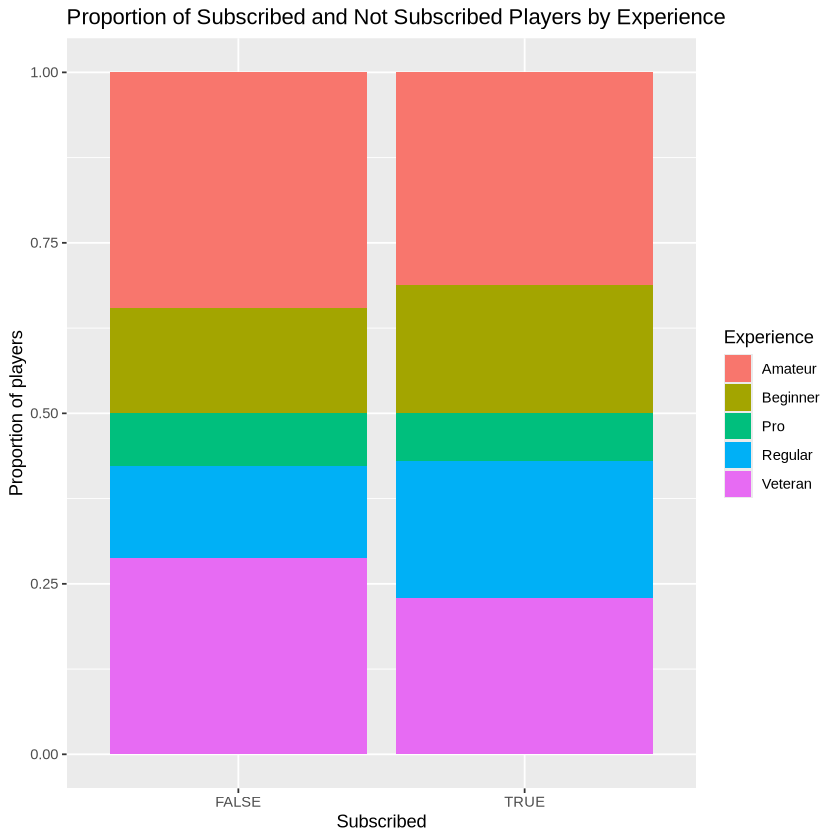

In [5]:
experience_plot <- clean_players |>
    ggplot(aes(x = subscribe, fill = experience)) +
    geom_bar(position = 'fill') +
    labs(x = "Subscribed", y = "Proportion of players", fill = "Experience") +
    ggtitle("Proportion of Subscribed and Not Subscribed Players by Experience")

experience_plot

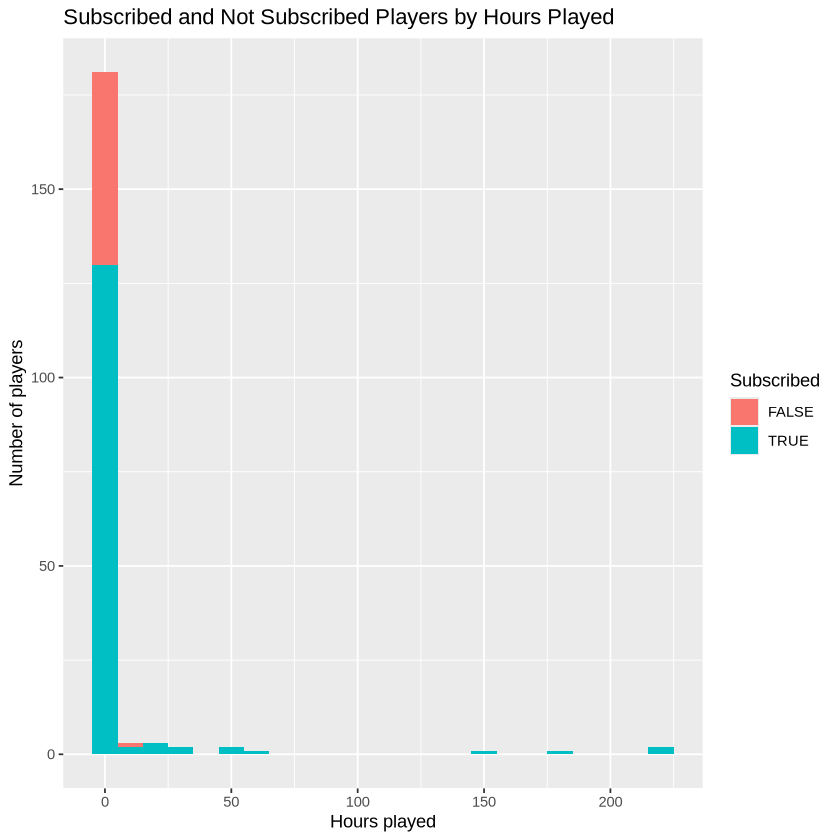

In [6]:
played_hours_plot <- clean_players |>
    ggplot(aes(played_hours, fill = subscribe)) +
    geom_histogram(binwidth = 10) +
    labs(x = "Hours played", y = "Number of players", fill = "Subscribed") +
    ggtitle("Subscribed and Not Subscribed Players by Hours Played")

played_hours_plot

For gender, we could do what we did with experience, which was a bar chart of proportions.

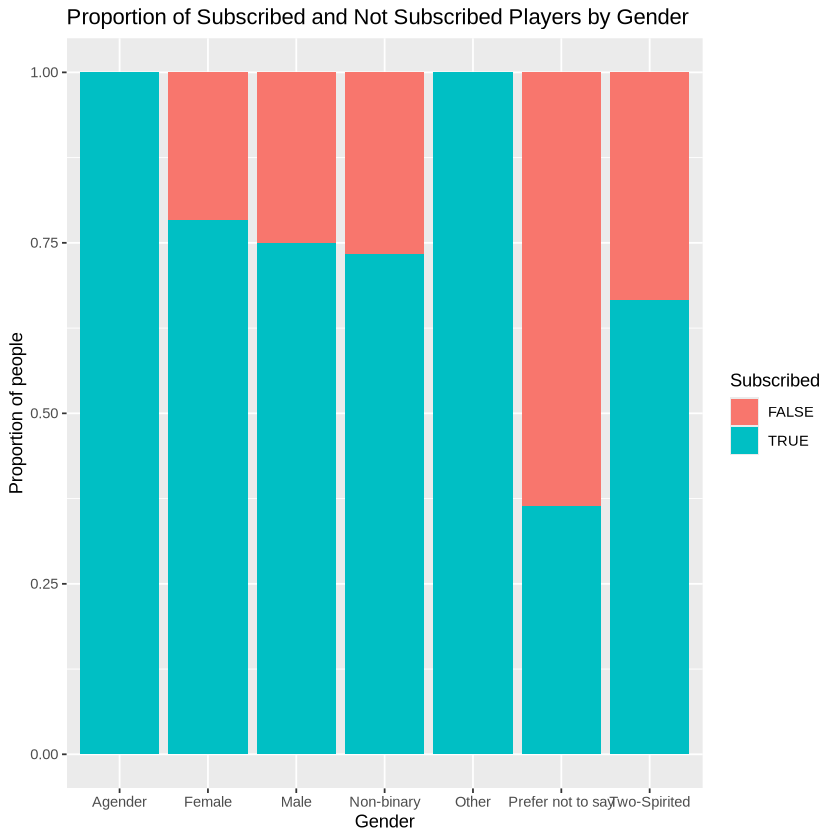

In [20]:
gender_plot <- clean_players |>
    ggplot(aes(x = gender, fill = subscribe)) +
    geom_bar(position = 'fill') +
    labs(x = "Gender", y = "Proportion of players", fill = "Subscribed") +
    ggtitle("Proportion of Subscribed and Not Subscribed Players by Gender")

gender_plot

Although we still get interesting results, they would only really be useful if we had an equal gender split. 

In [8]:
# Getting gender count of players
gender_count <- clean_players |>
    count(gender)

gender_count

gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


As we can see, the gender distribution is very uneven. A 100% subscribe rate from agender people would be a lot more significant if there was more than 2 of them in the study. So, the more useful visualization would be a non-proportional bar graph.

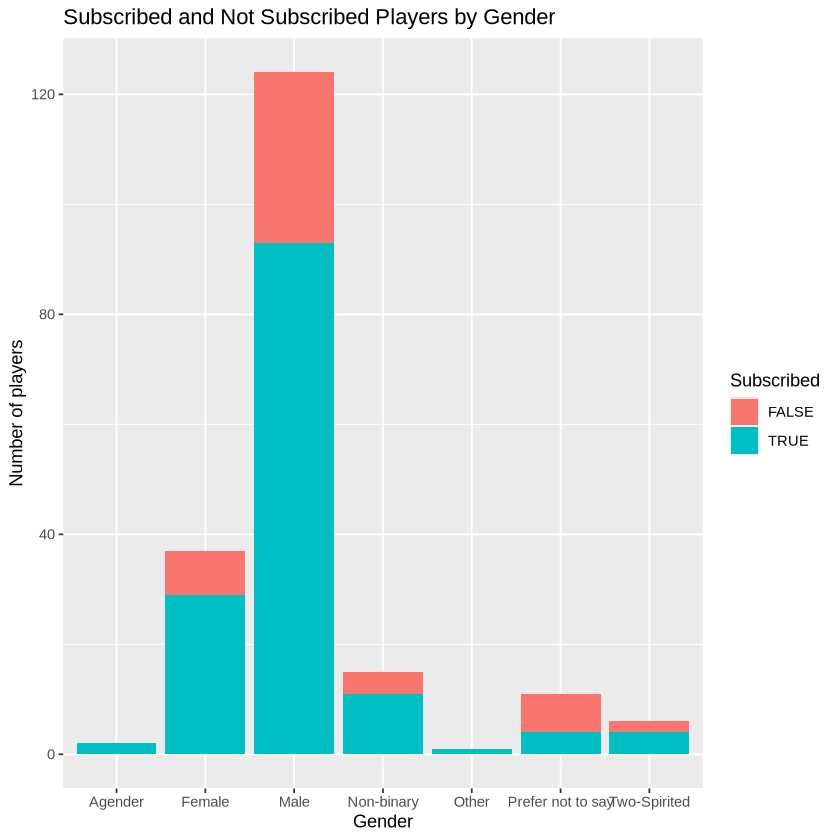

In [37]:
gender_plot <- clean_players |>
    ggplot(aes(x = gender, fill = subscribe)) +
    geom_bar() +
    labs(x = "Gender", y = "Number of players", fill = "Subscribed") +
    ggtitle("Subscribed and Not Subscribed Players by Gender")

gender_plot

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


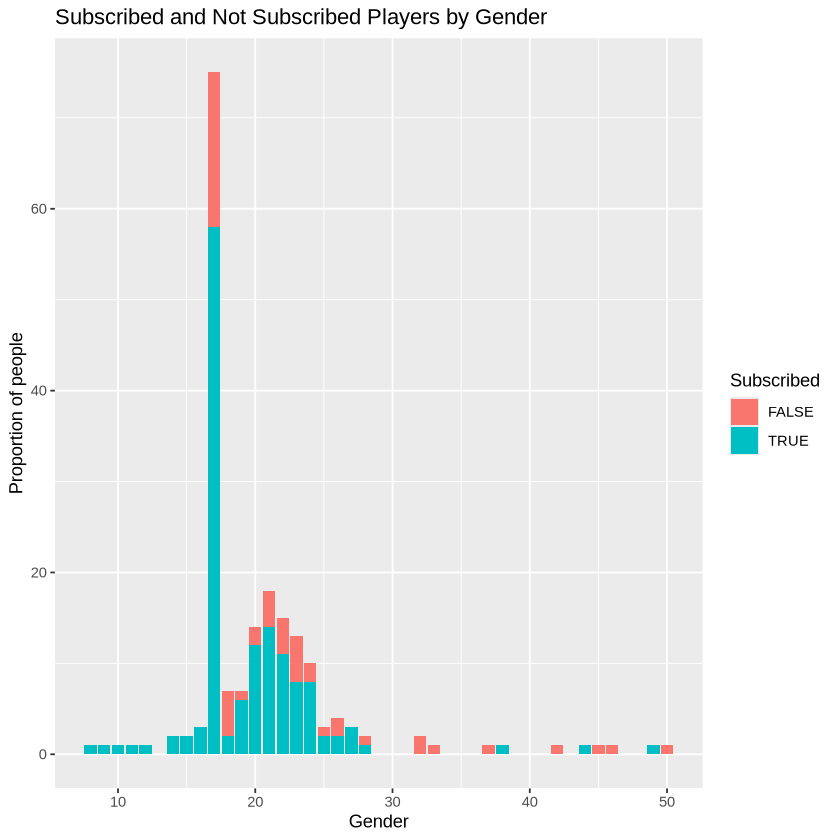

In [36]:
age_plot <- clean_players |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_bar() +
    labs(x = "Age", y = "Number of players", fill = "Subscribed") +
    ggtitle("Subscribed and Not Subscribed Players by Gender")

age_plot